# Assignment 6: Track 2 Project Report

## Team: dayan-hunt
* Nikhil Kakodkar: 260578689 | nikhil.kakodkar@mail.mcgill.ca
* Karim Koreitem: 260460964 | karim.koreitem@mail.mcgill.ca

In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
from math import sqrt
import matplotlib.pyplot as plt
from sr_main import run_experiment, compute_transition_mtx, compute_reward_vector

In [2]:
def init_default_config():
    config = {'switch_reward': False,
              'terminal_step' : 50000,
              'switch_reward_at_step' : 25000,
              'episode_length' : 20,
              'maze_type' : 'twobytwo',
              'maze_params' : {
                  'row' : 2,
                  'col' : 2,
                  'start_row' : 1,
                  'start_col' : 1
              },
              'learning_alg_params' : {
                  'alpha' : 0.01,
                  'gamma' : 0.9,
              },              
             }
    return config

def init_default_config_tenbyten():
    config = {'switch_reward': False,
              'terminal_step' : 80000,
              'switch_reward_at_step' : 40000,
              'episode_length' : 50,
              'maze_type' : 'tenbyten',
              'maze_params' : {
                  'row' : 10,
                  'col' : 10,
                  'start_row' : 1,
                  'start_col' : 1
              },
              'learning_alg_params' : {
                  'alpha' : 0.5,
                  'gamma' : 0.9,
              },              
             }
    return config

## Question 1: Learning SR using TD(0)

In [3]:
# P_pi_twobytwo = np.array([[0.5, 0.25, 0.25, 0.],
#                           [0.25, 0.5, 0., 0.25],
#                           [0.25, 0., 0.5, 0.25],
#                           [0., 0., 0., 1.]])

In [4]:
config = init_default_config_tenbyten()
result = run_experiment(config)

In [5]:
terminal_step = config['terminal_step']
approx_Phi_pi = result[terminal_step-1]['Phi_pi']

In [6]:
# Calculate exact phi_pi for 10x10 gridworld
state_len = config['maze_params']['row']*config['maze_params']['col']
gamma = config['learning_alg_params']['gamma']
P_pi = compute_transition_mtx(config)
exact_Phi_pi = inv(np.identity(state_len)-gamma*P_pi)

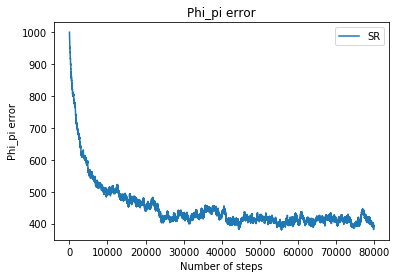

In [7]:
## Phi_pi error
err_sr = []

for s in range(terminal_step):
    est_Phi_pi = result[s]['Phi_pi']
    err_sr.append(np.sum(np.abs(est_Phi_pi - exact_Phi_pi)))
    
# Plotting Phi_pi error:
plt.ylabel('Phi_pi error')
plt.xlabel('Number of steps')
plt.title('Phi_pi error')
plt.plot(err_sr, label='SR')
plt.legend()

## Question 2: Value Prediction with SR


In [8]:
r1_pi, r2_pi = compute_reward_vector(config)

In [9]:
exact_V_pi_R1 = exact_Phi_pi.dot(r1_pi)
approx_V_pi = approx_Phi_pi.dot(r1_pi)
td_V_pi = result[terminal_step-1]['V_pi']

In [10]:
V_pi_sr = np.zeros((state_len,1))
V_pi_td = np.zeros((state_len,1))

err_sr = []
err_regular_td = []

for s in range(terminal_step):
    V_pi_sr = result[s]['Phi_pi'].dot(r1_pi)
    err_sr.append(np.sum(np.abs(V_pi_sr - exact_V_pi_R1)))

    V_pi_td = result[s]['V_pi']
    err_regular_td.append(np.sum(np.abs(V_pi_td - exact_V_pi_R1)))

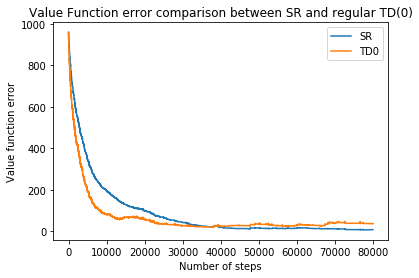

In [11]:
# Plotting value function error for the two algorithms:
plt.ylabel('Value function error')
plt.xlabel('Number of steps')
plt.title('Value Function error comparison between SR and regular TD(0)')
plt.plot(err_sr, label='SR')
plt.plot(err_regular_td, label='TD0')
plt.legend()

## Question 3: Tracking with SR

In [12]:
config = init_default_config_tenbyten()
config['switch_reward'] = True
result = run_experiment(config)

state_len = config['maze_params']['row']*config['maze_params']['col']
terminal_step = config['terminal_step']
switch_step = config['switch_reward_at_step']

In [13]:
# Calculate exact phi_pi for 10x10 gridworld
gamma = config['learning_alg_params']['gamma']
P_pi = compute_transition_mtx(config)
exact_Phi_pi = inv(np.identity(state_len)-gamma*P_pi)

In [14]:
r1_pi, r2_pi = compute_reward_vector(config)

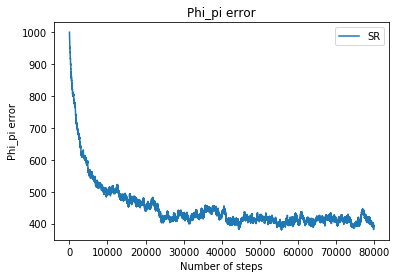

In [15]:
## Phi_pi error
err_phi_sr = []

for s in range(terminal_step):
    est_Phi_pi = result[s]['Phi_pi']
    err_phi_sr.append(np.sum(np.abs(est_Phi_pi - exact_Phi_pi)))
    
# Plotting Phi_pi error:
plt.ylabel('Phi_pi error')
plt.xlabel('Number of steps')
plt.title('Phi_pi error')
plt.plot(err_phi_sr, label='SR')
plt.legend()

In [16]:
exact_V_R1 = exact_Phi_pi.dot(r1_pi) 
exact_V_R2 = exact_Phi_pi.dot(r2_pi)

err_sr = []
err_regular_td = []

for s in range(terminal_step):
    if s <= switch_step:
        pass
        V_pi_sr = result[s]['Phi_pi'].dot(r1_pi)
        err_sr.append(np.sum(np.abs(V_pi_sr - exact_V_R1)))
        
        V_pi_td = result[s]['V_pi']
        err_regular_td.append(np.sum(np.abs(V_pi_td - exact_V_R1)))
    else:
        V_pi_sr = result[s]['Phi_pi'].dot(r2_pi)
        err_sr.append(np.sum(np.abs(V_pi_sr - exact_V_R2)))
    
        V_pi_td = result[s]['V_pi']
        err_regular_td.append(np.sum(np.abs(V_pi_td - exact_V_R2)))

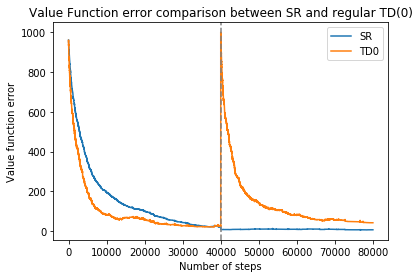

In [17]:
# Plotting value function error for the two algorithms:
plt.ylabel('Value function error')
plt.xlabel('Number of steps')
plt.title('Value Function error comparison between SR and regular TD(0)')
plt.plot(err_sr, label='SR')
plt.plot(err_regular_td, label='TD0')
plt.axvline(x=switch_step, color='grey', linestyle='--')
plt.legend()

## Question 4: Eigendecomposition

In [18]:
eig_vals, eig_vecs = np.linalg.eig(exact_Phi_pi)

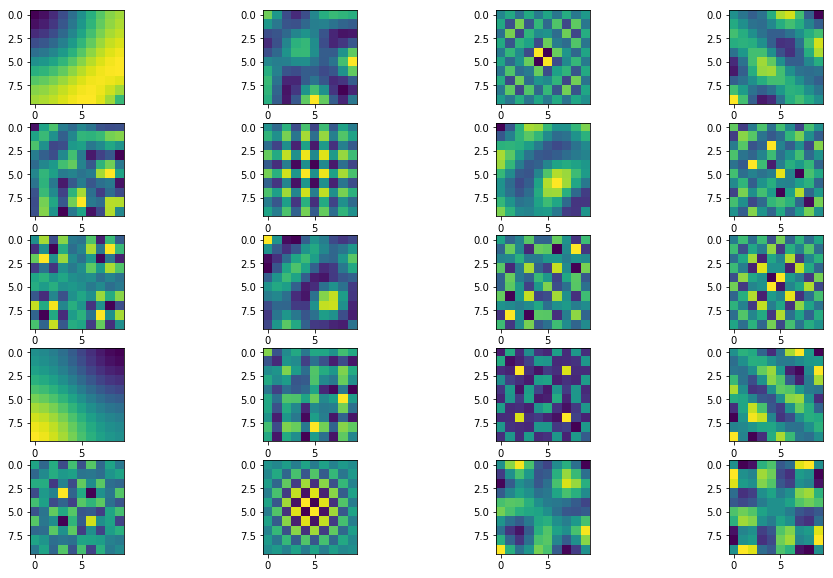

In [19]:
nrow = config['maze_params']['row']
ncol = config['maze_params']['col']
state_len = nrow*ncol
vec_ids = np.random.choice(range(state_len), 20, replace=False)


fig = plt.figure(figsize=(16, 10))

for n, i in enumerate(vec_ids):
    new_vec = eig_vecs[:,i].reshape([nrow,ncol])
    
    ax1 = fig.add_subplot(5, 4, n+1)   
    ax1.imshow(new_vec)